In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

from math import sqrt, floor
from statsmodels.formula import\
    api as sm
from scipy.stats import\
    ttest_ind as t_Test,\
    f_oneway as f_Test
from sklearn.metrics import\
    mean_squared_error as MSE,\
    mean_absolute_error as MAE,\
    r2_score as R2

In [2]:
combinedDF = pd.read_csv("DW_prayer_times.csv")
combinedDF = combinedDF.loc[2525:2556,:].reset_index(drop=True)
combinedDF

,date,esolat_fajr,esolat_zuhr,esolat_asr,esolat_maghrib,esolat_isha,google_fajr,google_zuhr,google_asr,google_maghrib,google_isha
0,2024-11-30,352,785,987,1142,1216,352,783,987,1142,1216
1,2024-12-01,352,785,988,1142,1217,352,783,987,1142,1216
2,2024-12-02,353,785,988,1143,1217,352,784,988,1142,1217
3,2024-12-03,353,786,988,1143,1217,353,784,988,1143,1217
4,2024-12-04,353,786,989,1144,1218,353,784,989,1143,1217
5,2024-12-05,354,787,989,1144,1218,353,785,989,1143,1218
6,2024-12-06,354,787,990,1144,1219,354,785,989,1144,1218
7,2024-12-07,355,788,990,1145,1219,354,786,990,1144,1219
8,2024-12-08,355,788,991,1145,1220,355,786,990,1145,1219
9,2024-12-09,355,788,991,1146,1220,355,786,991,1145,1220


In [3]:
compareFajr = combinedDF["esolat_fajr"] - combinedDF["google_fajr"]
compareZuhr = combinedDF["esolat_zuhr"] - combinedDF["google_zuhr"]
compareAsr = combinedDF["esolat_asr"] - combinedDF["google_asr"]
compareMaghrib = combinedDF["esolat_maghrib"] - combinedDF["google_maghrib"]
compareIsha = combinedDF["esolat_isha"] - combinedDF["google_isha"]

compareDF = pd.DataFrame([combinedDF["date"],compareFajr,compareZuhr,compareAsr,compareMaghrib,compareIsha]).transpose()
compareDF.columns = ["date","diff_fajr","diff_zuhr","diff_asr","diff_maghrib","diff_isha"]

compareDF

,date,diff_fajr,diff_zuhr,diff_asr,diff_maghrib,diff_isha
0,2024-11-30,0,2,0,0,0
1,2024-12-01,0,2,1,0,1
2,2024-12-02,1,1,0,1,0
3,2024-12-03,0,2,0,0,0
4,2024-12-04,0,2,0,1,1
5,2024-12-05,1,2,0,1,0
6,2024-12-06,0,2,1,0,1
7,2024-12-07,1,2,0,1,0
8,2024-12-08,0,2,1,0,1
9,2024-12-09,0,2,0,1,0


In [4]:
def plot_scatter_diff(col_name = ""):
    if col_name not in compareDF.columns:
        return
    
    compareDF.plot(
        title="""
            Prayer Time difference between e-Solat JAKIM vs Google Search results page
        """,
        label=col_name,
        x="date",
        y=col_name,
        yticks=np.arange(-5,6,1),
        ylabel="Time difference (min)",
        kind="line",
        marker=".",
        color="C0",
        figsize=(12,5)
    )
    
    plt.xticks(rotation=45)

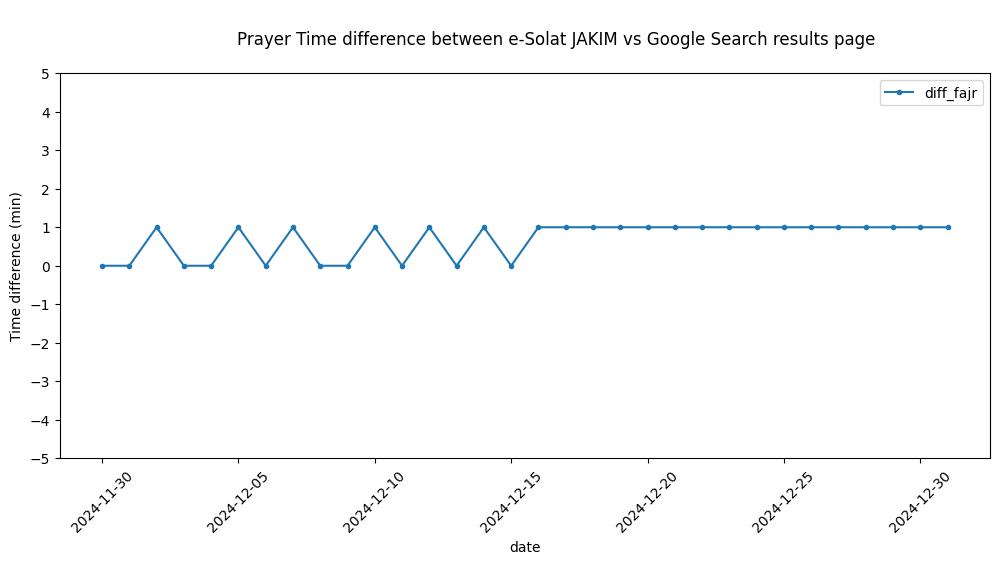

In [5]:
plot_scatter_diff("diff_fajr")

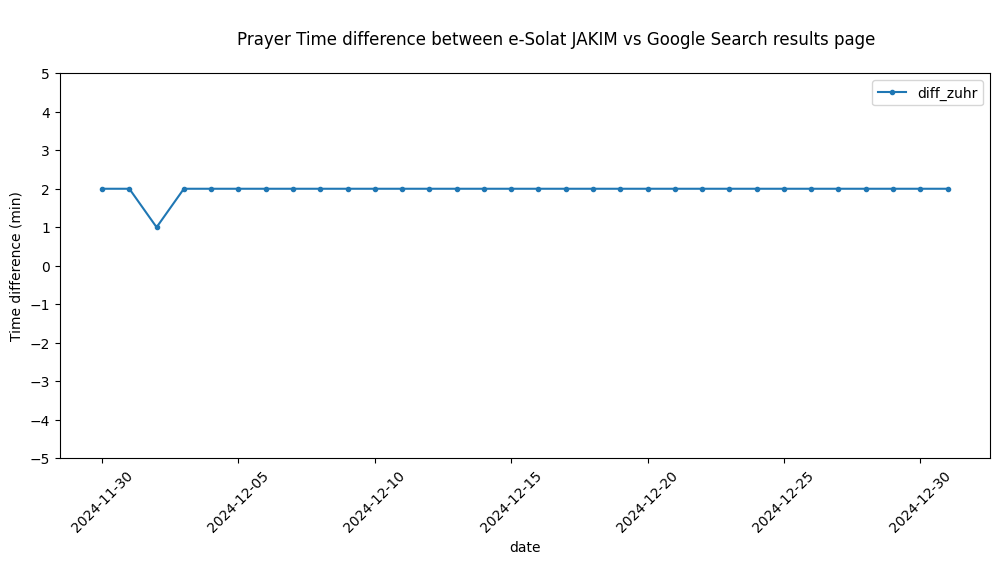

In [6]:
plot_scatter_diff("diff_zuhr")

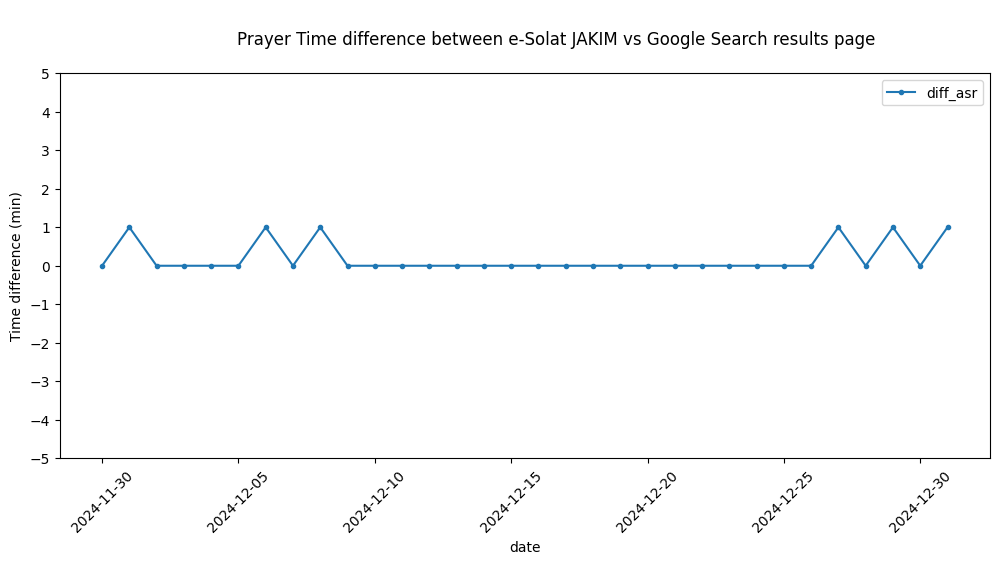

In [7]:
plot_scatter_diff("diff_asr")

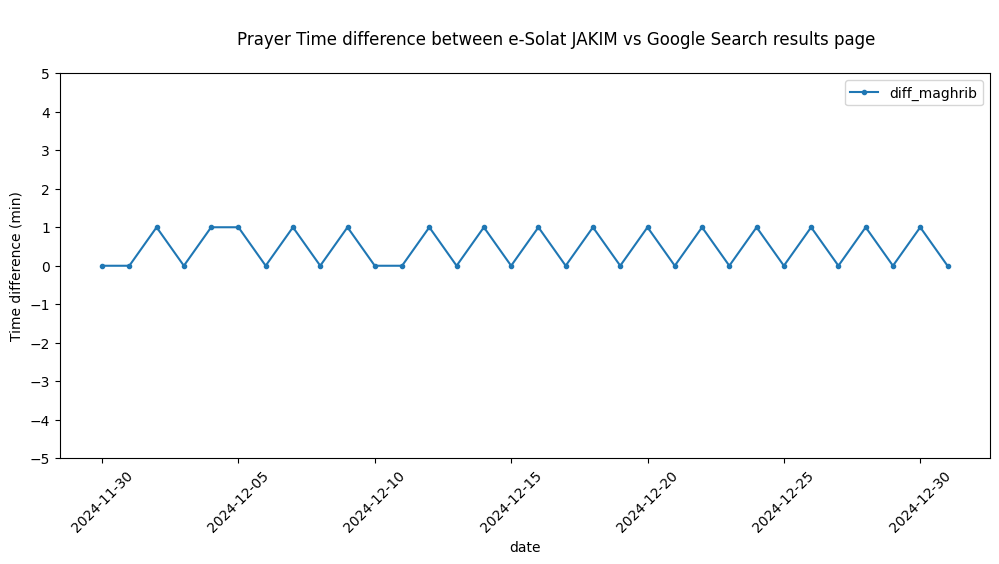

In [8]:
plot_scatter_diff("diff_maghrib")

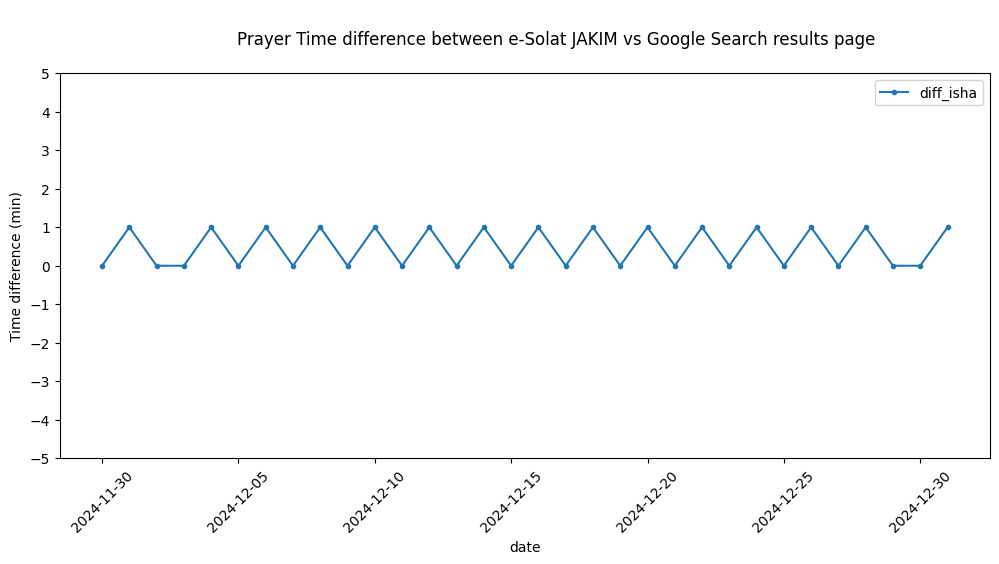

In [9]:
plot_scatter_diff("diff_isha")

In [12]:
def showStatisticsEvaluation(df1 = [], df2 = []):
    if (len(df1) == 0 or len(df2) == 0 or len(df1) != len(df2)):
        return print("Invalid data inputs!")
    
    eval_r2 = R2(df1,df2)
    eval_mae = MAE(df1,df2)
    eval_rmse = sqrt(MSE(df1,df2))
    eval_t = t_Test(df1,df2)[1]
    eval_F = f_Test(df1,df2)[1]

    print("--==================================--")
    print("Statistics Evaluation for Accuracy")
    print(f"R\u00b2 = {eval_r2:.6f}")
    print(f"MAE = {eval_mae:.6f}")
    print(f"RMSE = {eval_rmse:.6f}")
    print(f"t-Test (p-value) = {eval_t:.6f}")
    print(f"F-test (p-value) = {eval_F:.6f}")
    print("--==================================--")

In [13]:
print("Comparing e-Solat JAKIM vs Google Search results page - Fajr prayer time")
showStatisticsEvaluation(combinedDF["esolat_fajr"], combinedDF["google_fajr"])

Comparing e-Solat JAKIM vs Google Search results page - Fajr prayer time
--==================================--
Statistics Evaluation for Accuracy
R² = 0.963868
MAE = 0.687500
RMSE = 0.829156
t-Test (p-value) = 0.523836
F-test (p-value) = 0.523836
--==================================--


In [14]:
print("Comparing e-Solat JAKIM vs Google Search results page - Zuhr prayer time")
showStatisticsEvaluation(combinedDF["esolat_zuhr"], combinedDF["google_zuhr"])

Comparing e-Solat JAKIM vs Google Search results page - Zuhr prayer time
--==================================--
Statistics Evaluation for Accuracy
R² = 0.798783
MAE = 1.968750
RMSE = 1.976424
t-Test (p-value) = 0.081984
F-test (p-value) = 0.081984
--==================================--


In [15]:
print("Comparing e-Solat JAKIM vs Google Search results page - Asr prayer time")
showStatisticsEvaluation(combinedDF["esolat_asr"], combinedDF["google_asr"])

Comparing e-Solat JAKIM vs Google Search results page - Asr prayer time
--==================================--
Statistics Evaluation for Accuracy
R² = 0.990305
MAE = 0.187500
RMSE = 0.433013
t-Test (p-value) = 0.866768
F-test (p-value) = 0.866768
--==================================--


In [16]:
print("Comparing e-Solat JAKIM vs Google Search results page - Maghrib prayer time")
showStatisticsEvaluation(combinedDF["esolat_maghrib"], combinedDF["google_maghrib"])

Comparing e-Solat JAKIM vs Google Search results page - Maghrib prayer time
--==================================--
Statistics Evaluation for Accuracy
R² = 0.974662
MAE = 0.468750
RMSE = 0.684653
t-Test (p-value) = 0.668900
F-test (p-value) = 0.668900
--==================================--


In [17]:
print("Comparing e-Solat JAKIM vs Google Search results page - Isha prayer time")
showStatisticsEvaluation(combinedDF["esolat_isha"], combinedDF["google_isha"])

Comparing e-Solat JAKIM vs Google Search results page - Isha prayer time
--==================================--
Statistics Evaluation for Accuracy
R² = 0.976994
MAE = 0.468750
RMSE = 0.684653
t-Test (p-value) = 0.683255
F-test (p-value) = 0.683255
--==================================--
